In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Пример 1: распознавание типа цветка ирис

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [5]:
from sklearn.datasets import load_iris

In [6]:
flowers = load_iris()

In [11]:
flowers.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df = pd.DataFrame(flowers.data, columns=flowers.feature_names)
df['target'] = flowers.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [53]:
tree = DecisionTreeClassifier()
tree.fit(flowers.data, flowers.target)

DecisionTreeClassifier()

In [32]:
tree.score(flowers.data, flowers.target)

0.98

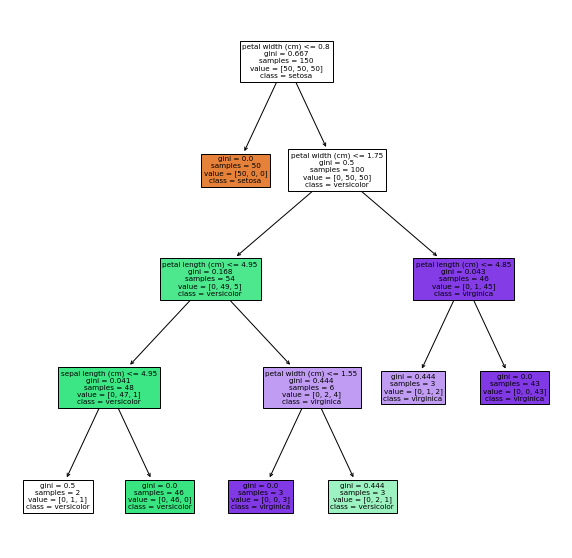

In [33]:
plt.figure(figsize=[10,10])
plot_tree(tree, feature_names=flowers.feature_names, class_names=flowers.target_names, filled=True)
plt.show()

In [34]:
from sklearn.datasets import load_digits

In [35]:
digits = load_digits()

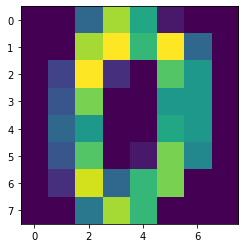

In [36]:
plt.imshow(digits.data[0].reshape(8,8))
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    test_size=0.3, 
                                                    stratify=digits.target)

In [58]:
tree = DecisionTreeClassifier( )
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
tree.score(X_test, y_test)

0.8537037037037037

In [48]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_set = {'max_depth': range(1,15), 
             'min_samples_leaf': range(1, 10),
             'max_leaf_nodes': range(1,20)}

In [74]:
grid_tree = GridSearchCV(tree, param_grid=param_set, cv=10, n_jobs=-1)

In [75]:
grid_tree.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1260 fits failed out of a total of 23940.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1260 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.w

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'max_leaf_nodes': range(1, 20),
                         'min_samples_leaf': range(1, 10)})

In [76]:
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=19, min_samples_leaf=9)

In [77]:
grid_tree.best_estimator_.score(X_test, y_test)

0.8074074074074075